In [46]:
from meteostat import Point

vancouver = Point(33.589886,-7.603869,62)

In [47]:
vancouver.get_stations()

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance,score
id,,,,,,,,,,,,,,,,,
60155,Casablanca,MA,CBL,60155,GMMC,33.5667,-7.6667,62.0,Africa/Casablanca,1949-01-01,2024-11-11,1957-01-04,2024-11-08,1949-01-01,2021-01-01,6366.082499,0.890867
GMMT0,Casablanca / Tit Mellil,MA,CBL,<NA>,GMMT,33.5949,-7.4645,96.0,Africa/Casablanca,2011-11-12,2021-07-06,NaT,NaT,NaT,NaT,12921.056782,0.739639
60156,Nouasseur,MA,CO,60156,GMMN,33.3667,-7.5833,200.0,Africa/Casablanca,1942-11-21,2024-11-12,1942-11-21,2024-11-08,1942-01-01,2022-01-01,24890.366537,0.415594


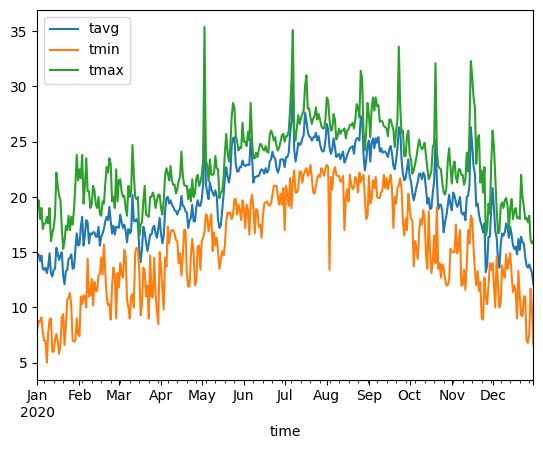

In [48]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 31)

# Create Point for casablanca
vancouver = Point(33.589886,-7.603869,70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [ ]:
from datetime import datetime
import pandas as pd
from meteostat import Point, Daily


start = datetime(2000, 1, 1)
end = datetime(2022, 12, 31)
vancouver = Point(33.589886,-7.603869,62)  # Latitude, Longitude, Elevation

# Fetch daily weather data for Vancouver
data = Daily(vancouver, start, end)
data = data.fetch()

# Save data to CSV
data.to_csv('./data/vancouver_weather_2000 to 2022.csv')


In [ ]:
import pandas as pd 

data=pd.read_csv("./data/vancouver_weather_2000 to 2022.csv")

In [78]:
data.head(100)

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2000-01-01,11.2,6.0,16.4,0.0,NaN,NaN,3.7,NaN,NaN,NaN
1,2000-01-02,11.8,5.8,18.0,0.0,NaN,NaN,5.4,NaN,NaN,NaN
2,2000-01-03,12.8,5.9,17.4,0.0,NaN,NaN,4.5,NaN,NaN,NaN
3,2000-01-04,13.8,10.0,17.5,0.0,NaN,NaN,3.1,NaN,NaN,NaN
4,2000-01-05,11.9,7.0,18.0,0.0,NaN,NaN,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,2000-04-05,14.2,10.5,17.8,1.0,NaN,123.0,6.7,NaN,NaN,NaN
96,2000-04-06,16.4,11.0,21.5,0.8,NaN,120.0,8.5,NaN,NaN,NaN
97,2000-04-07,19.4,15.7,25.0,0.0,NaN,269.0,14.5,NaN,NaN,NaN
98,2000-04-08,17.7,14.3,22.0,0.8,NaN,267.0,14.1,NaN,NaN,NaN



1. **time**:  
   - **Description**: The date of the weather observation (formatted as YYYY-MM-DD).
   
2. **tavg**:  
   - **Description**: **Average temperature** for the day in Celsius (°C).  
   
3. **tmin**:  
   - **Description**: **Minimum temperature** for the day in Celsius (°C).  
   
4. **tmax**:  
   - **Description**: **Maximum temperature** for the day in Celsius (°C).
   
5. **prcp**:  
   - **Description**: **Precipitation** in millimeters (mm) for the day.  
   
6. **snow**:  
   - **Description**: **Snowfall** in centimeters (cm) for the day.
   
7. **wdir**:  
   - **Description**: **Wind direction** in degrees (°), indicating where the wind is coming from.  
     - 0° is north, 90° is east, 180° is south, and 270° is west.
   
8. **wspd**:  
   - **Description**: **Wind speed** in meters per second (m/s).  
   
9. **wpgt**:  
   - **Description**: **Wind gusts** in meters per second (m/s), representing the highest wind speed recorded during a short burst.
   
10. **pres**:  
    - **Description**: **Atmospheric pressure** in hectopascals (hPa). It indicates the air pressure at the location.
   
11. **tsun**:  
    - **Description**: **Sunshine duration** in hours (h), representing the total number of hours the sun was shining during the day.

### Summary of the Columns:
- **time**: Date of the observation
- **tavg**: Average temperature (°C)
- **tmin**: Minimum temperature (°C)
- **tmax**: Maximum temperature (°C)
- **prcp**: Precipitation (mm)
- **snow**: Snowfall (cm)
- **wdir**: Wind direction (°)
- **wspd**: Wind speed (m/s)
- **wpgt**: Wind gusts (m/s)
- **pres**: Atmospheric pressure (hPa)
- **tsun**: Sunshine duration (hours)


In [79]:
data.isna().sum()

time       0
tavg      47
tmin     140
tmax     152
prcp    2556
snow    8401
wdir    1393
wspd     431
wpgt    7530
pres    5796
tsun    8401
dtype: int64

In [80]:
data_clean = data.interpolate(method='linear')


In [81]:
data_clean.isna().sum()

time       0
tavg       0
tmin       0
tmax       0
prcp       0
snow    8401
wdir       5
wspd       0
wpgt    6776
pres    5698
tsun    8401
dtype: int64

In [82]:
data_clean = data_clean.drop(columns=['tsun', 'snow'])

In [83]:
data_clean['wpgt']=data_clean['wpgt'].bfill()
data_clean['pres']=data_clean['pres'].bfill()

In [84]:
data_clean

,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2000-01-01,11.2,6.0,16.4,0.0,NaN,3.7,37.0,1014.1
1,2000-01-02,11.8,5.8,18.0,0.0,NaN,5.4,37.0,1014.1
2,2000-01-03,12.8,5.9,17.4,0.0,NaN,4.5,37.0,1014.1
3,2000-01-04,13.8,10.0,17.5,0.0,NaN,3.1,37.0,1014.1
4,2000-01-05,11.9,7.0,18.0,0.0,NaN,5.0,37.0,1014.1
...,...,...,...,...,...,...,...,...,...
8396,2022-12-27,15.6,11.6,21.0,0.0,126.0,5.4,18.5,1024.5
8397,2022-12-28,15.1,10.3,18.3,0.0,229.0,8.1,22.2,1024.9
8398,2022-12-29,15.8,10.0,20.5,0.0,160.0,7.6,20.4,1026.3
8399,2022-12-30,17.4,9.8,24.5,0.0,195.0,5.9,20.4,1025.9


In [85]:
data_clean.to_csv('./data/clean_casablanca_weather_data.csv',index=False)